<a href="https://colab.research.google.com/github/eversonmariano/Analise-de-Dados_Machine-learning/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Marketing

##Importação das bibliotecas e base de dados

In [223]:
import pandas as pd #carregamento da base de dados
import numpy as np #biblioteca de funções matematica
import seaborn as sns #biblioteca para gerarmos gráficos
import matplotlib.pyplot as plt #geração de gráficos
from sklearn.preprocessing import StandardScaler #colocar os dados na mesma escala
from sklearn.cluster import KMeans #segmentação de mercado ou agrupamentpo dos clientes
from sklearn.decomposition import PCA #redução de dimensionalidade dos dados

In [224]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [225]:
#(linhas, colunas) = cada linha representa 1 cliente e cada coluna uma característica.
creditcard_df.shape

(8950, 18)

In [226]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [227]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [228]:
#Estatisticas 
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [229]:
#Caracteristica do cliente que faz mais compras a vista
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000] 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [230]:
#Caracteristica do cliente que saca o maior valor do cartão de crédito
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


##Visualização e exploração dos dados

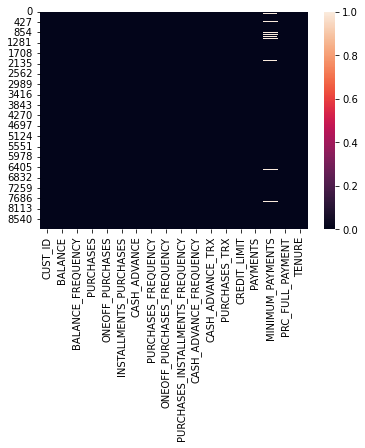

In [231]:
#verificar se a base de dados possui algum valor nulo
sns.heatmap(creditcard_df.isnull());

In [232]:
#contagem de quantos elementos nulos existem
print(creditcard_df.isnull().sum());

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [233]:
#Média dos pagamentos minimos
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [234]:
#Preencherá os valores nulos da coluna pela média
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [235]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [236]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [237]:
print(creditcard_df.isnull().sum());

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


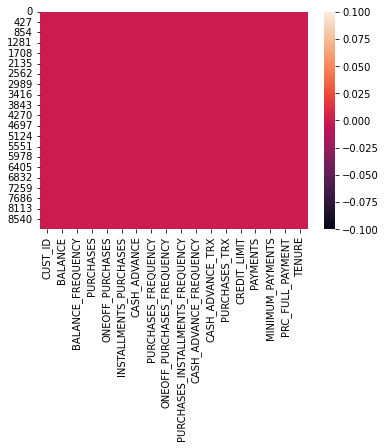

In [238]:
sns.heatmap(creditcard_df.isnull());

In [239]:
#verificar se tem valores duplicados
creditcard_df.duplicated().sum()

0

In [240]:
#Apagando um atributo irrelevante
creditcard_df.drop('CUST_ID', axis = 1, inplace=True)

In [241]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [242]:
#retornar todas as colunas do dataframe
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

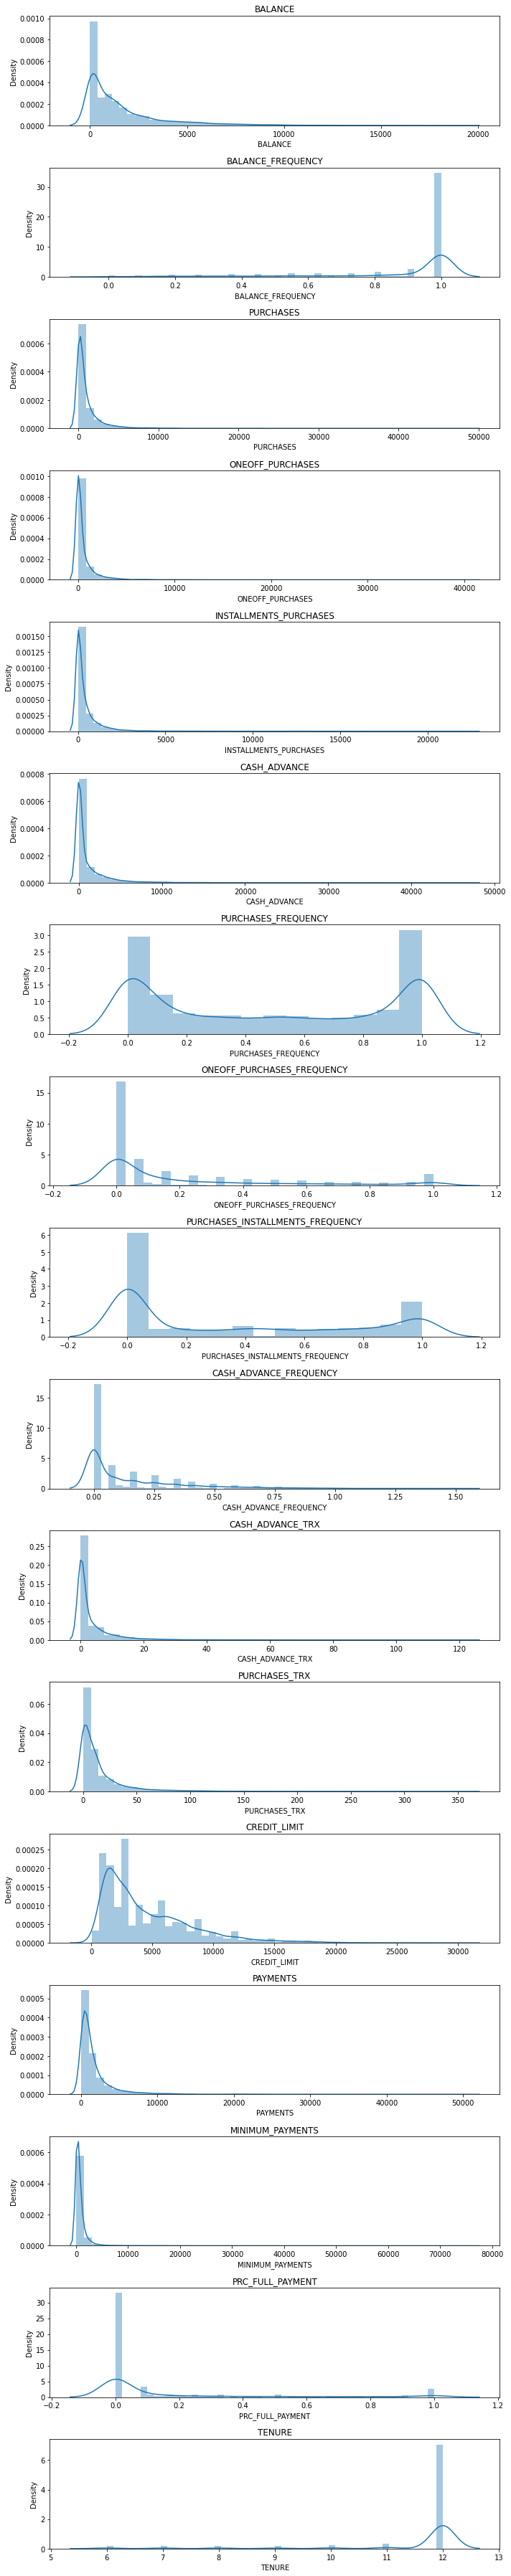

In [243]:
#criar uma figura para cada coluna
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();#Melhorar a visualização dos gráficos, dando um afastamento.

In [244]:
#gerar a matrix de correlações
correlations = creditcard_df.corr()

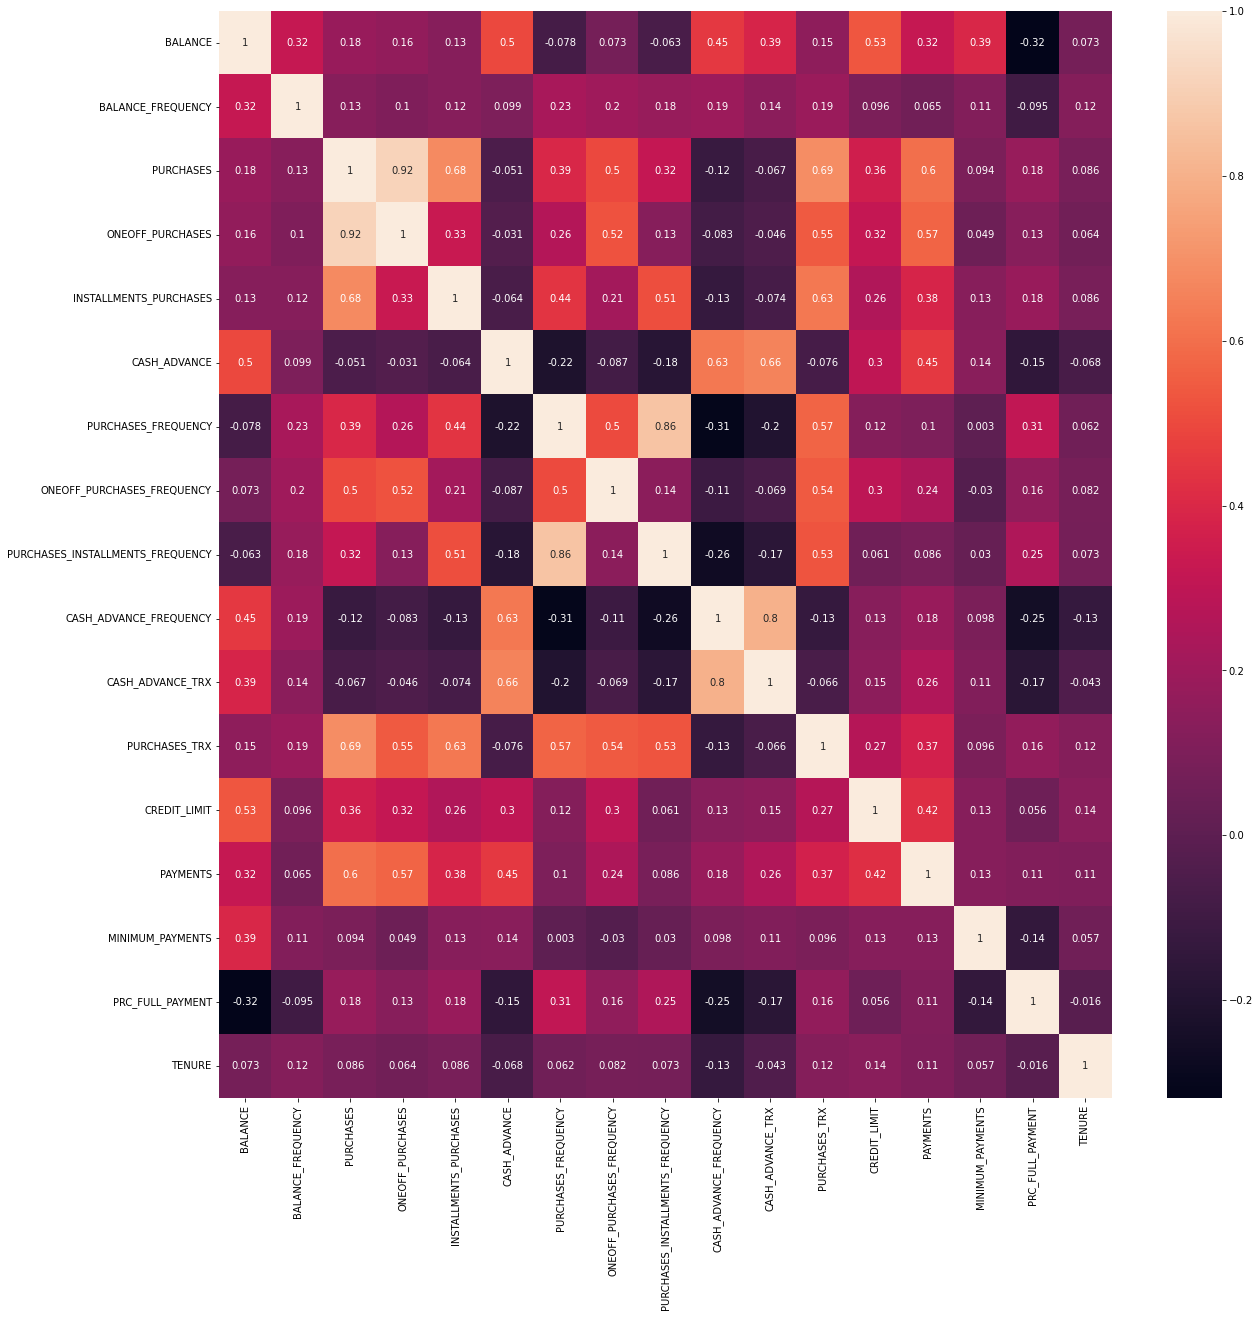

In [245]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

# Definição do nº de clusters usando o Elbow Method (Método do cotovelo)

In [289]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE']) 

(0.0, 19043.13856)

In [290]:
#escalonando os dados: fazendo isso o tipo dos dados serão alterados
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [291]:
type(creditcard_df_scaled) , type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [292]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0]) 

(-0.9604333444542572, 0.36067954425377496)

In [293]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [294]:
#Elbow Method
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [295]:
print(wcss_1)

[152149.99999999983, 127784.81423417776, 111986.70111696055, 99073.93826774803, 91502.98259428913, 85052.27552329749, 79529.38180312194, 74814.16451755466, 69860.63963871375, 66611.42093545955, 63645.153610237874, 61362.860864369955, 59151.24714256676, 57502.07528660723, 56004.6735747079, 54287.75887028709, 53282.22792394525, 52179.36676291097, 50558.67682723614]


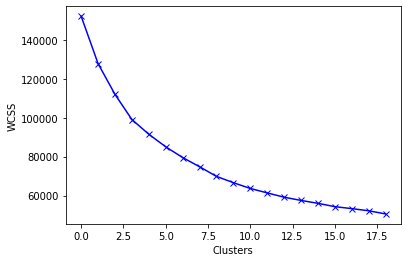

In [296]:
#Visualização do Elbow Method
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

##Agrupamento com K-Means 

In [297]:
#Usar o número de clusters encontrados, para fazer o agrupamento
kmeans = KMeans(n_clusters=8) #testar com 8 clusters, mas poderia ser outros
kmeans.fit(creditcard_df_scaled) #'fit' faz o treinamento da base de dados, para encontrar os centróides.
labels = kmeans.labels_

In [298]:
#labels = qtd dos grupos de cada um dos clientes
labels , len(labels) #qtd total de clientes

(array([1, 6, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [299]:
#Qtd de clientes em cada grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2017, 2747, 1115, 1181,  364,   25,  877,  624]))

In [300]:
kmeans.cluster_centers_

array([[-3.64194833e-01,  3.32328794e-01, -3.57289223e-02,
        -2.41413873e-01,  3.58850932e-01, -3.63798273e-01,
         9.91209282e-01, -3.81285701e-01,  1.20222811e+00,
        -4.74061281e-01, -3.60234590e-01,  1.88061929e-01,
        -2.60377997e-01, -2.15784780e-01, -5.21616877e-02,
         3.13458820e-01,  2.56310047e-01],
       [ 1.37961526e-02,  4.04688993e-01, -3.56561777e-01,
        -2.40994123e-01, -4.00225341e-01, -9.78082233e-02,
        -8.52380129e-01, -3.93906403e-01, -7.54255298e-01,
         9.81383015e-02, -3.33136246e-02, -4.81093836e-01,
        -3.02198972e-01, -2.52291665e-01, -7.04552011e-03,
        -4.55923338e-01,  2.73056943e-01],
       [-1.42332097e-01,  3.99760932e-01,  5.40990776e-01,
         6.71441938e-01,  4.54267589e-02, -3.31677784e-01,
         9.81979349e-01,  1.91080478e+00,  1.67391456e-01,
        -4.14358056e-01, -3.32296247e-01,  6.17563181e-01,
         4.27345261e-01,  1.43233533e-01, -1.59860827e-01,
         4.52898807e-01,  2.6

In [301]:
#Dados após aplicados a padronização
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364195,0.332329,-0.035729,-0.241414,0.358851,-0.363798,0.991209,-0.381286,1.202228,-0.474061,-0.360235,0.188062,-0.260378,-0.215785,-0.052162,0.313459,0.256310
1,0.013796,0.404689,-0.356562,-0.240994,-0.400225,-0.097808,-0.852380,-0.393906,-0.754255,0.098138,-0.033314,-0.481094,-0.302199,-0.252292,-0.007046,-0.455923,0.273057
2,-0.142332,0.399761,0.540991,0.671442,0.045427,-0.331678,0.981979,1.910805,0.167391,-0.414358,-0.332296,0.617563,0.427345,0.143234,-0.159861,0.452899,0.268784
3,-0.701208,-2.141009,-0.310385,-0.234926,-0.302187,-0.322400,-0.554752,-0.442477,-0.439746,-0.521503,-0.376311,-0.419356,-0.175381,-0.201786,-0.256971,0.282604,0.201234
4,1.055994,0.468427,2.432260,1.771826,2.495934,-0.147328,1.168536,1.535165,1.279606,-0.272765,-0.143949,3.075885,1.274951,1.426513,0.731971,0.238241,0.338098
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,1.669856,0.390533,-0.222970,-0.159532,-0.234186,2.005597,-0.482208,-0.211380,-0.422027,1.918998,1.925983,-0.271551,1.017546,0.813768,0.507512,-0.391185,0.071837
7,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889


In [302]:
#Aqui apresenta os valores dos centroides (BALENCE) que indicam os valores médios de cada cluster
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,806.434025,0.955996,926.869440,191.739787,735.572090,215.969139,0.888171,0.088713,0.842234,0.040280,0.790490,19.384349,3547.087767,1108.468058,742.645930,0.245396,11.860327
1,1593.190355,0.973138,241.405102,192.436486,49.148835,773.762699,0.148249,0.084948,0.064677,0.154783,3.021486,2.751639,3394.925953,1002.784202,847.787255,0.020365,11.882739
2,1268.222582,0.971970,2159.039964,1706.893465,452.146499,283.327306,0.884466,0.772488,0.430963,0.052227,0.981149,30.060144,6049.306349,2147.790897,491.657628,0.286180,11.877020
3,104.968575,0.370085,340.061778,202.509086,137.804005,302.783168,0.267702,0.070458,0.189671,0.030786,0.680779,4.286198,3856.341613,1148.993000,265.345972,0.236372,11.786622
4,3762.436640,0.988237,6199.766676,3533.304973,2668.110055,669.916456,0.959341,0.660427,0.872985,0.080561,2.266484,91.164835,9133.241758,5862.758729,2570.034179,0.223396,11.969780
5,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
6,5040.138216,0.969784,526.826511,327.646146,199.296294,5184.701220,0.296817,0.139399,0.196713,0.519155,16.392246,7.960091,8196.698455,4088.922573,2046.940691,0.039300,11.613455
7,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372


OBS: A TABELA ACIMA MOSTRA VALORES ALEATÓRIOS DOS CLUSTERS. ABAIXO TEMOS ALGUMAS INTEPRETAÇÕES, QUE DEVIDO A MUITAS RODADAS, DIVERGEM DO QUE É VISTO.
COM ISSO, ABAIXO SEGUE APENAS UM EXEMPLO DE COMO EXPLICAR/INTEPRETAR DE ACORDO COM OS DADOS AGRUPADOS.

Grupo 5 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras.

Grupo 0: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (303). 23% de pagamento da fatura completa do cartão de crédito.

Grupo 3: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente ($083) e sacam muito dinheiro do cartão de crédito (5234), compram pouco (0.29) e usam bastante o limite do cartão para saques (0.52). Pagam muito pouco a fatura completa (0.03).

Grupo 7 (clientes novos): clientes mais novos (7.22 anos) e que mantém pouco dinheiro na conta corrente (865).

In [303]:
labels, len(labels)

(array([1, 6, 2, ..., 7, 7, 7], dtype=int32), 8950)

In [304]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


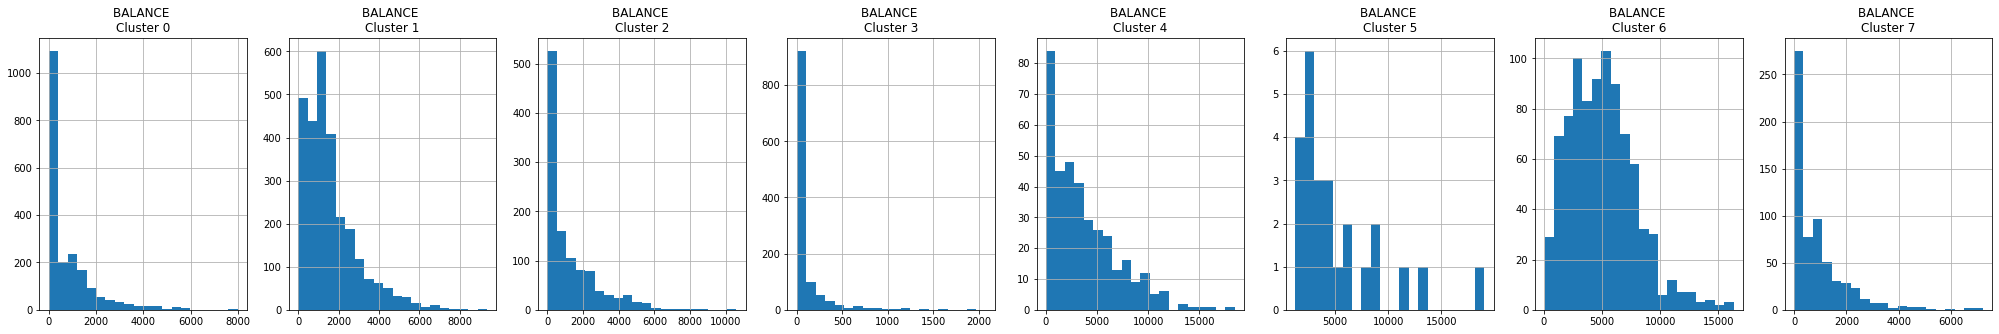

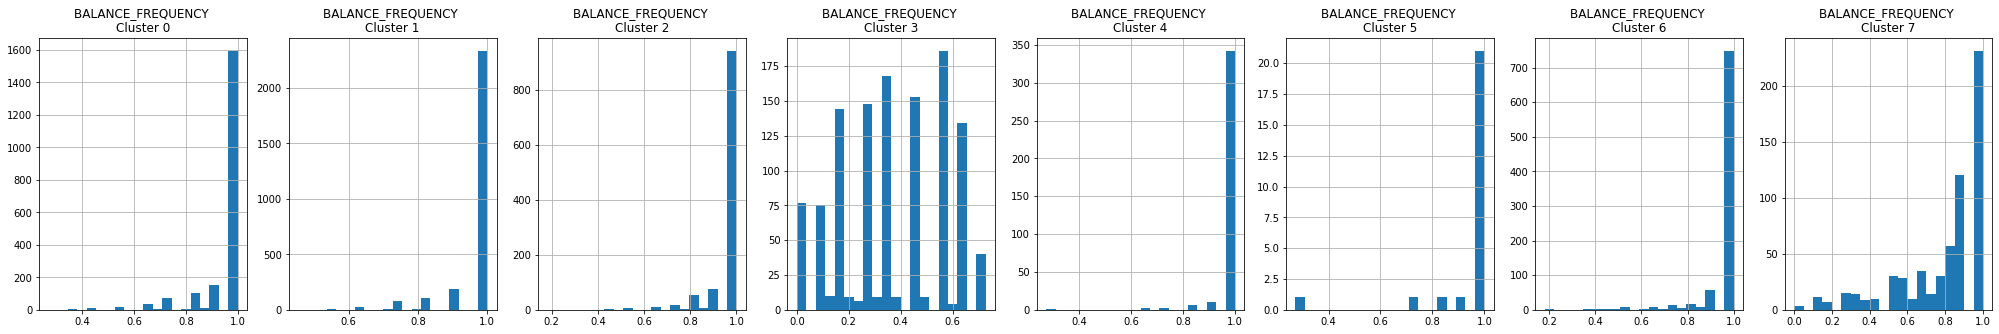

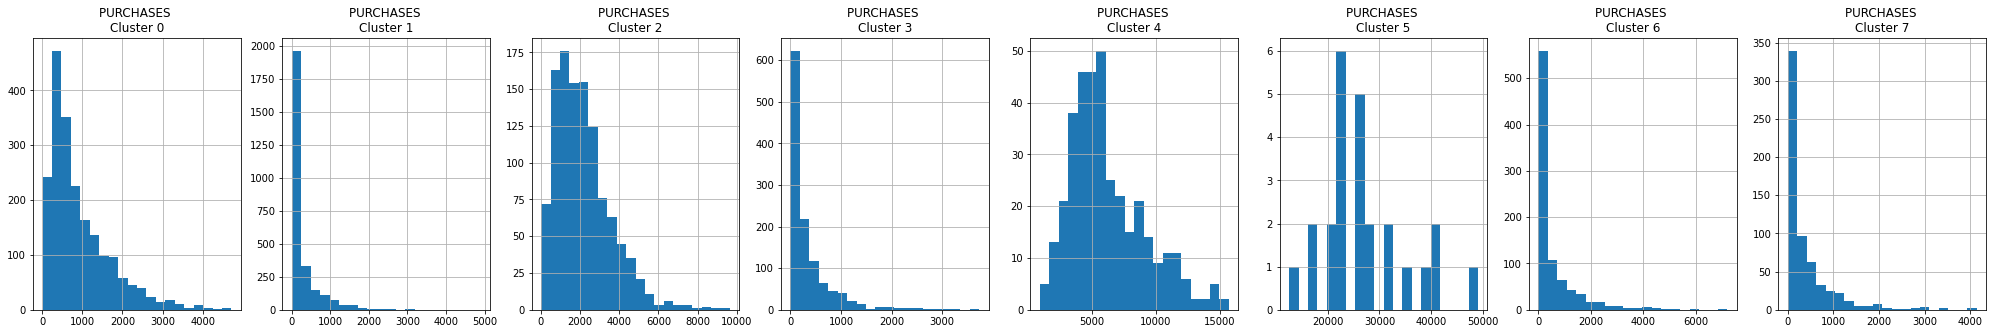

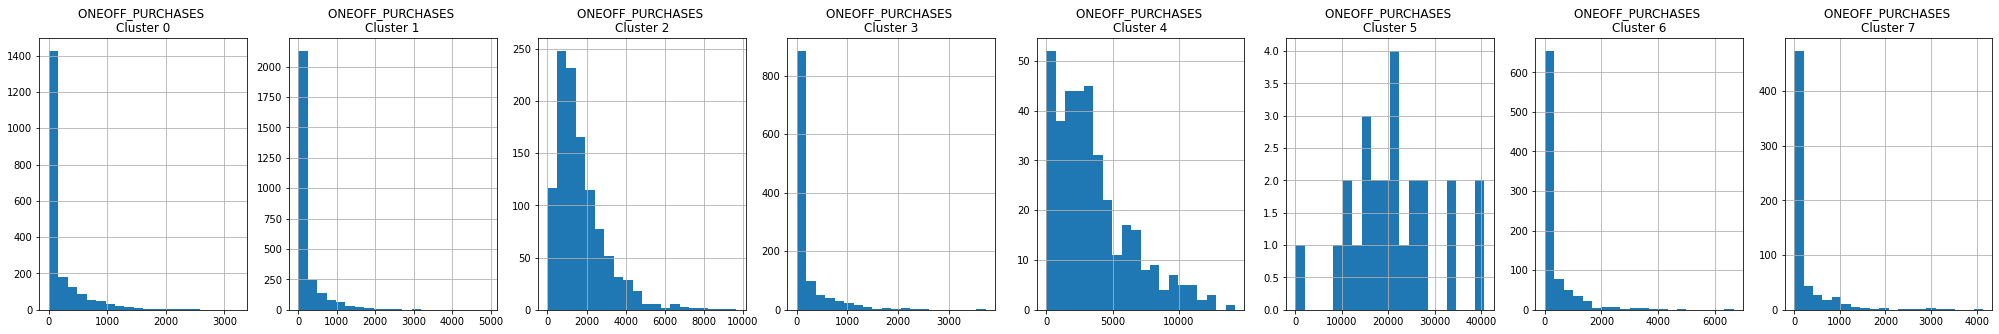

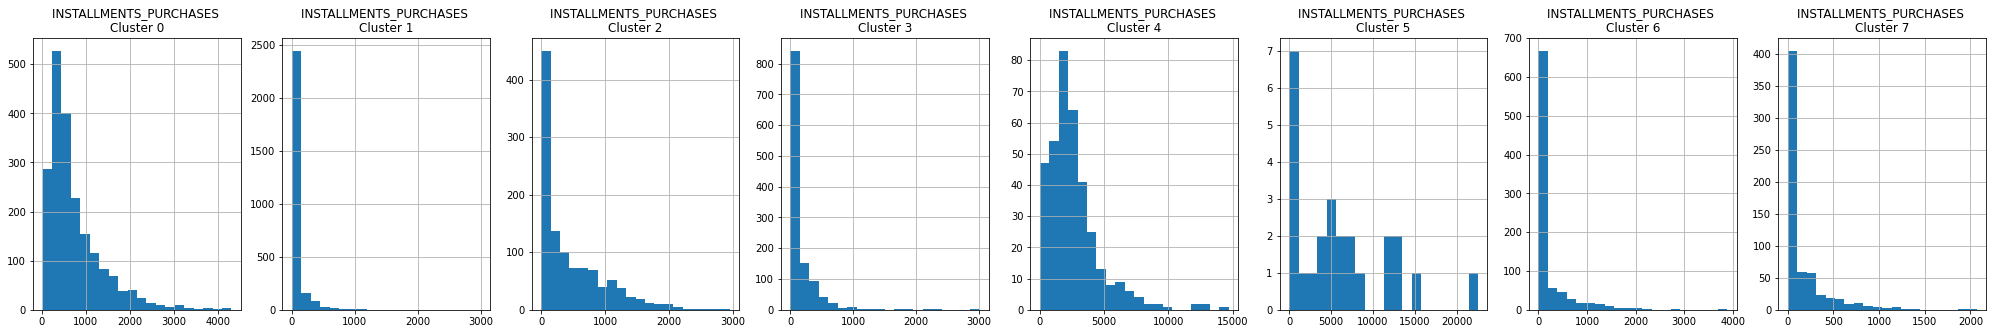

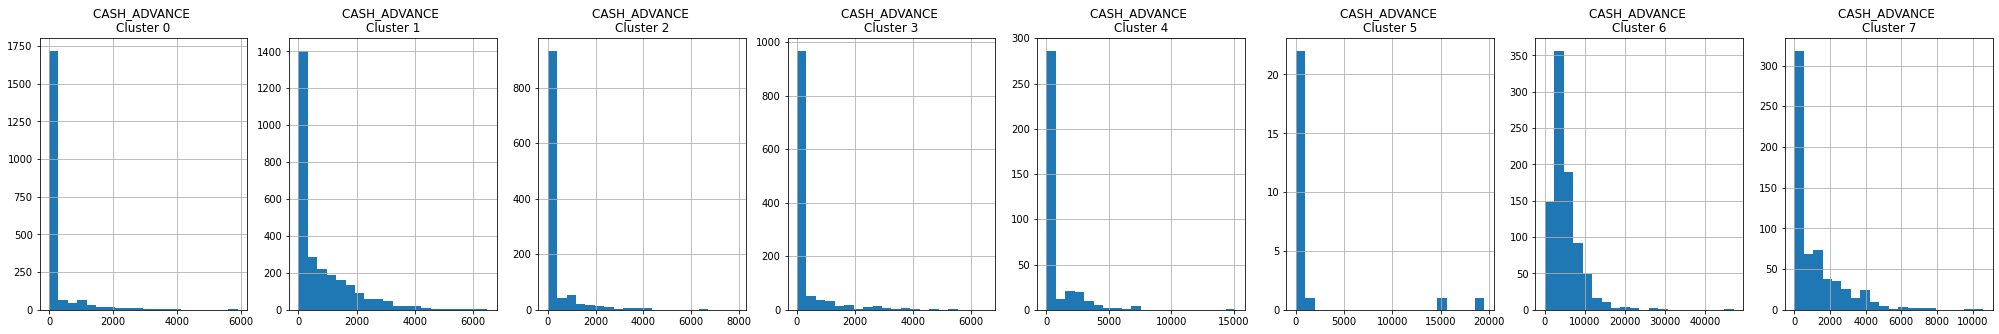

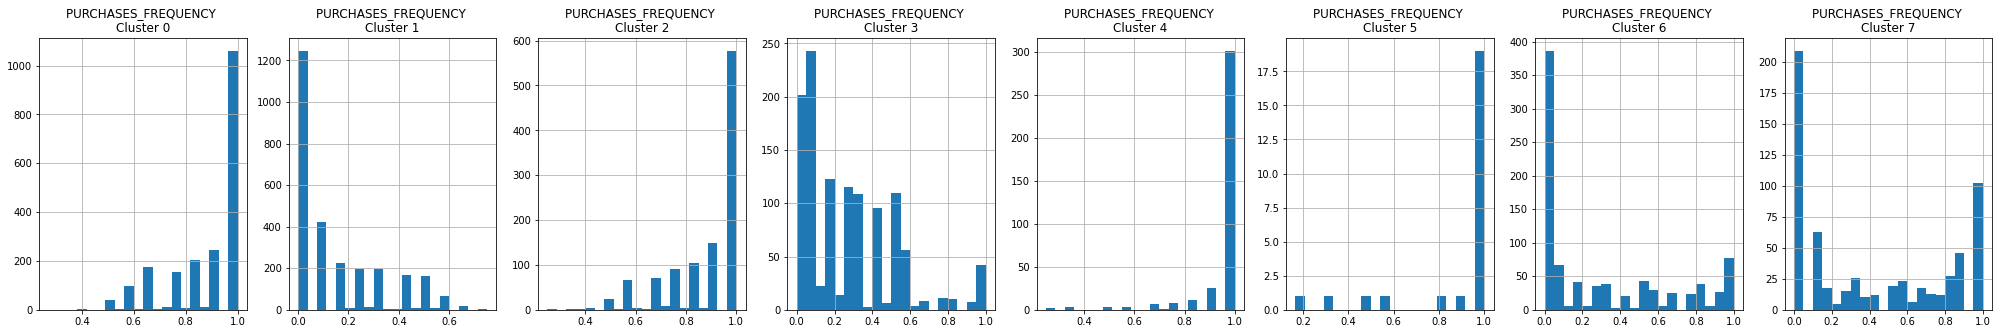

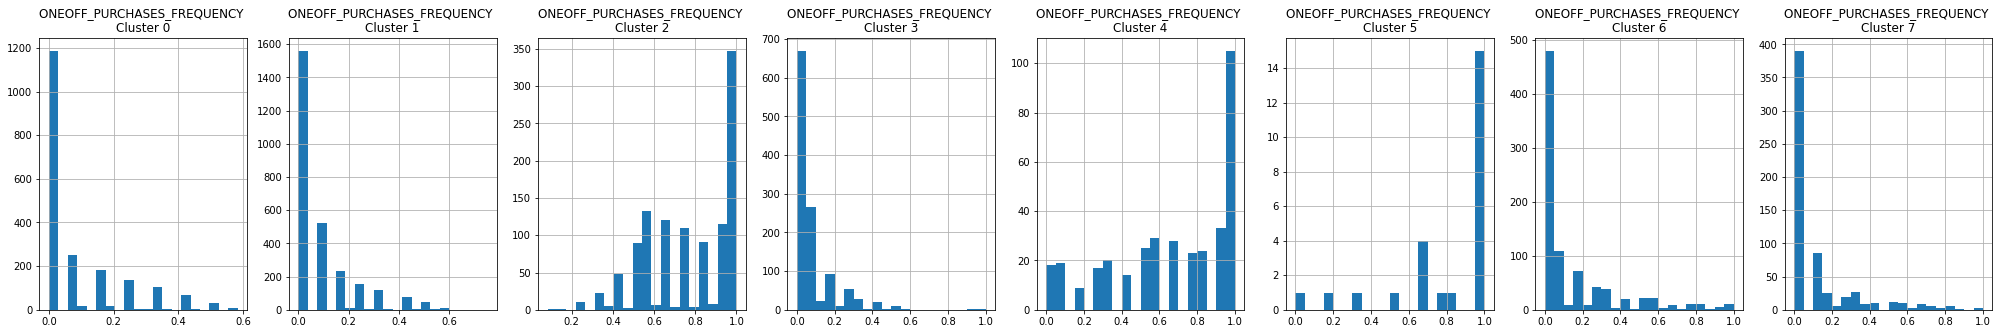

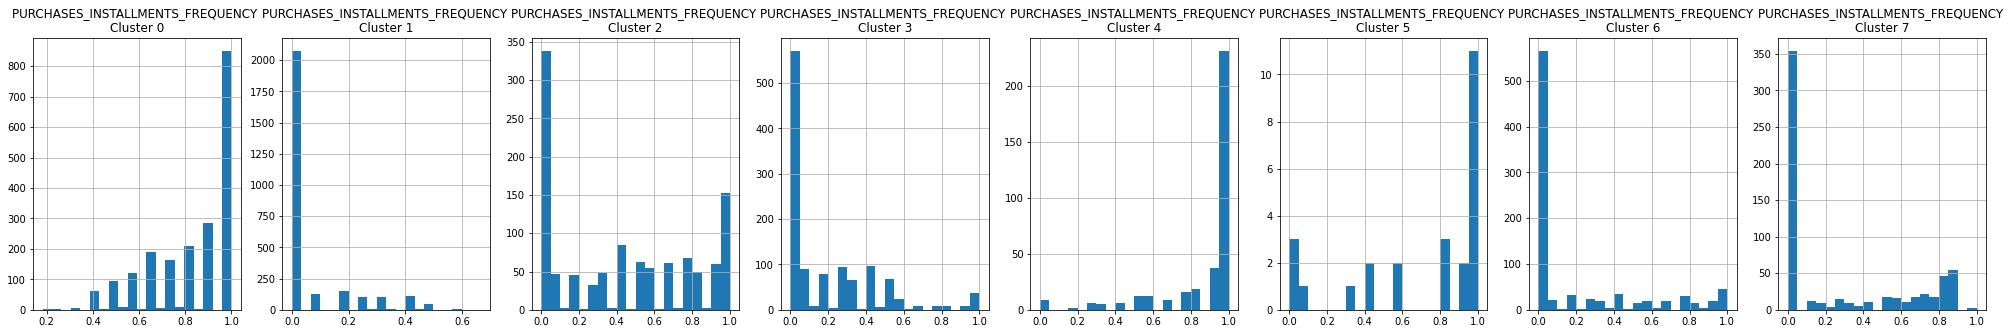

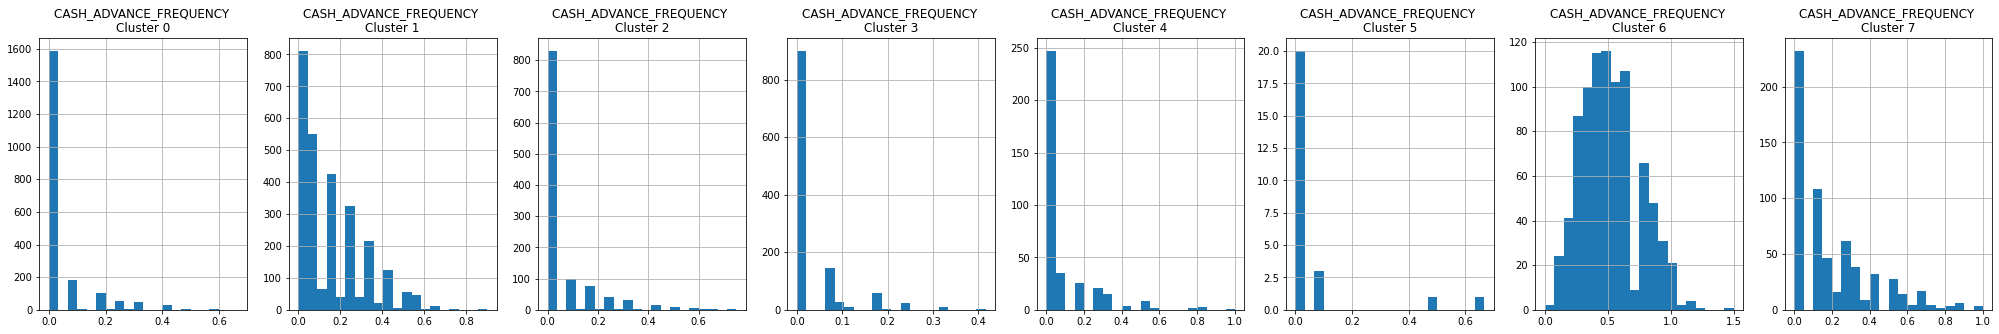

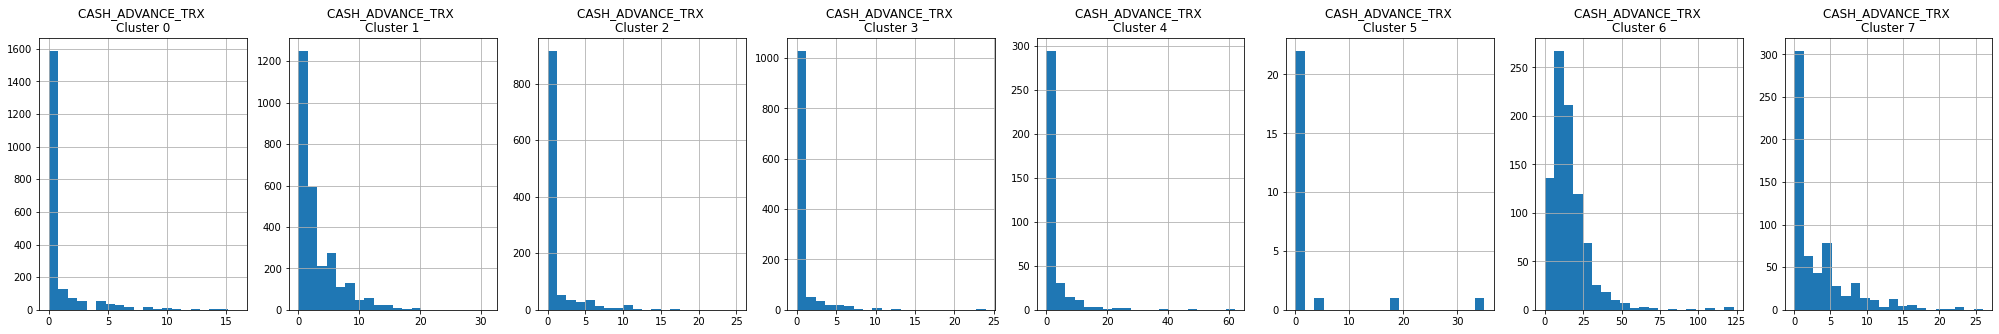

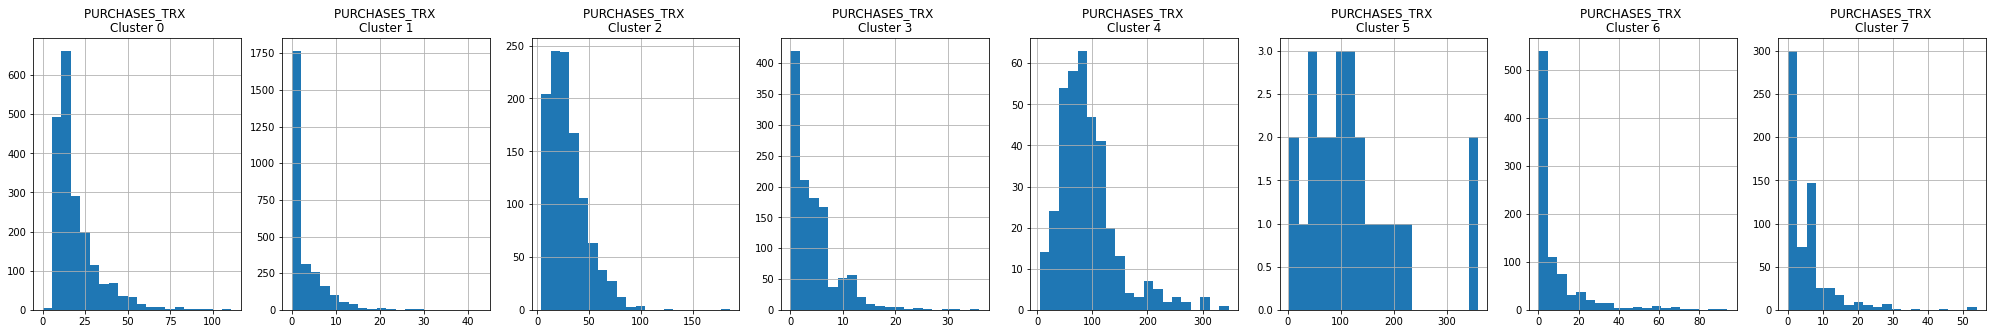

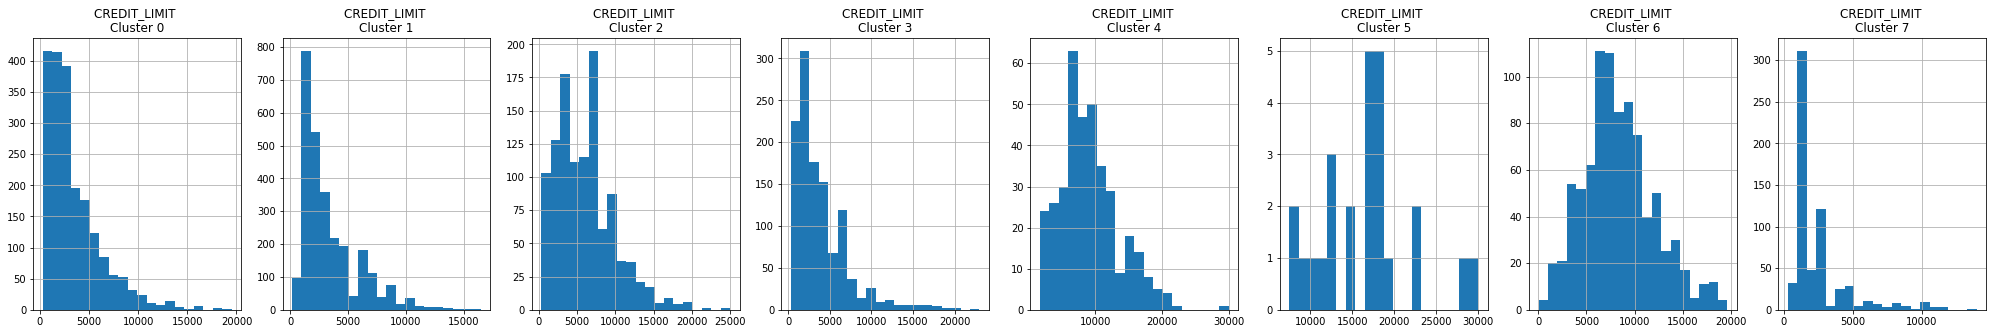

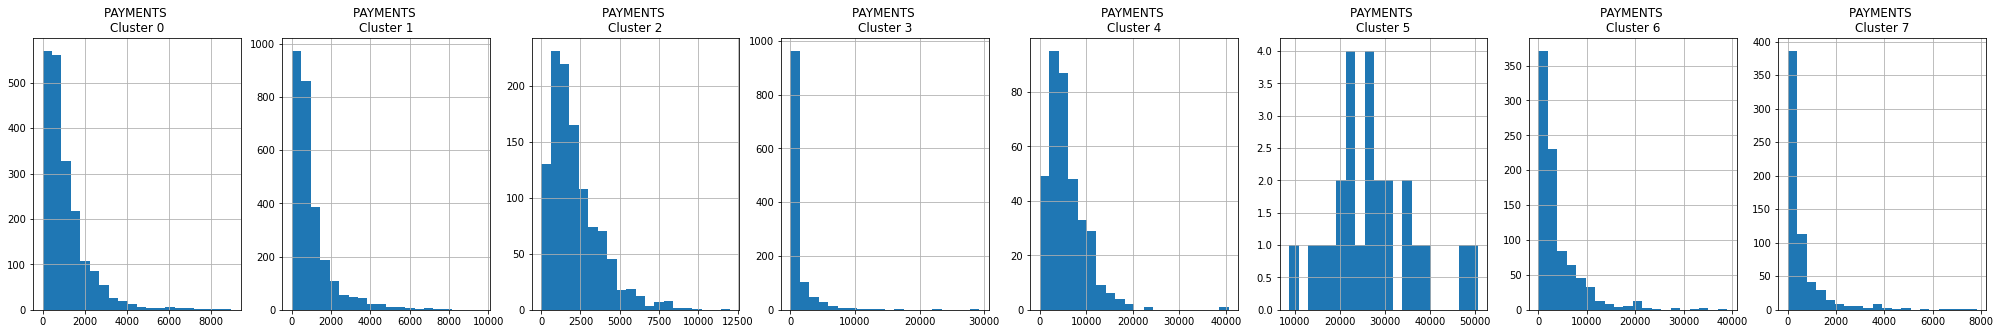

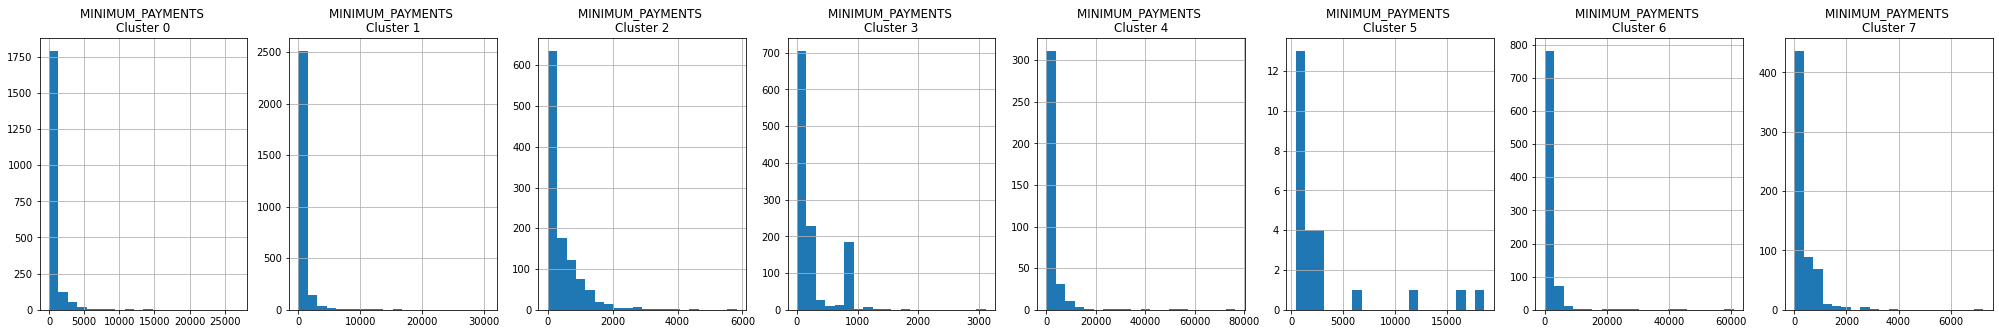

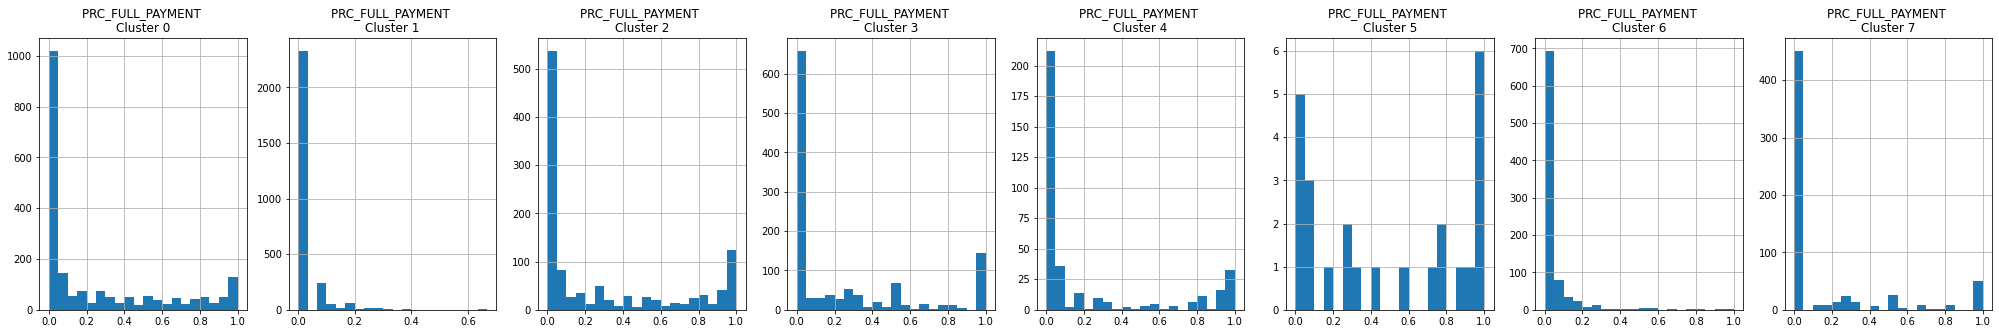

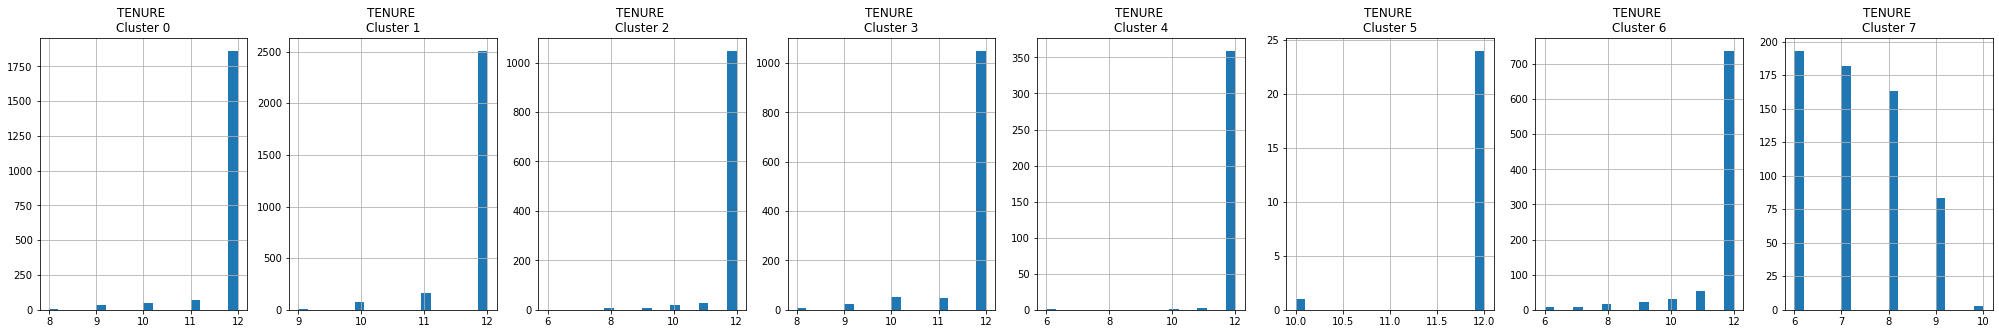

In [305]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [306]:
#Simular para enviar os dados p/ o departamento de dados e assim, fazer as respectivas campanhas.
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7060,1512.574159,1.0,622.03,0.00,622.03,1344.577203,1.000000,0.000000,1.000000,0.416667,6,17,1800.0,1064.435406,677.913200,0.000000,12,0
4438,308.769481,1.0,489.24,0.00,489.24,1010.553199,0.750000,0.000000,0.750000,0.416667,9,11,1000.0,1660.010795,207.644586,0.166667,12,0
6893,2135.744209,1.0,1342.31,241.75,1100.56,1993.285912,0.583333,0.166667,0.583333,0.250000,8,23,8000.0,5720.735722,513.579640,0.083333,12,0
6896,37.022109,1.0,247.92,0.00,247.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,227.869425,172.187284,0.333333,12,0
6897,344.023581,1.0,1551.27,944.77,606.50,0.000000,1.000000,0.333333,0.916667,0.000000,0,26,6500.0,1779.381962,195.950075,0.000000,12,0


In [307]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5174,365.482420,1.000000,1618.31,1000.00,618.31,0.000000,1.000000,0.142857,0.857143,0.000000,0,9,1000.0,1366.668756,380.796942,0.333333,7,7
5170,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,7
8100,20.890606,1.000000,110.00,0.00,110.00,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,56.715447,108.294662,0.333333,8,7
5228,138.537976,0.333333,987.45,987.45,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,12,3000.0,0.000000,864.206542,0.000000,6,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,7


In [308]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [311]:
#O n_components definirá o numero de caracteristicas que serão representadas no gráficos. 
#Os 18 atributos serão reduzidos a apenas 2
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp 

array([[-1.68222126, -1.07644946],
       [-1.13829363,  2.5064799 ],
       [ 0.96968534, -0.38351855],
       ...,
       [-0.92620447, -1.81078496],
       [-2.33655302, -0.65796737],
       [-0.55641999, -0.4004701 ]])

In [312]:
#
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076449
1,-1.138294,2.506480
2,0.969685,-0.383519
3,-0.873633,0.043165
4,-1.599433,-0.688579


In [313]:
#fazer a concatenação dos clusters p/ vosualizar os clusters no grafico
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076449,1
1,-1.138294,2.506480,6
2,0.969685,-0.383519,2
3,-0.873633,0.043165,1
4,-1.599433,-0.688579,1


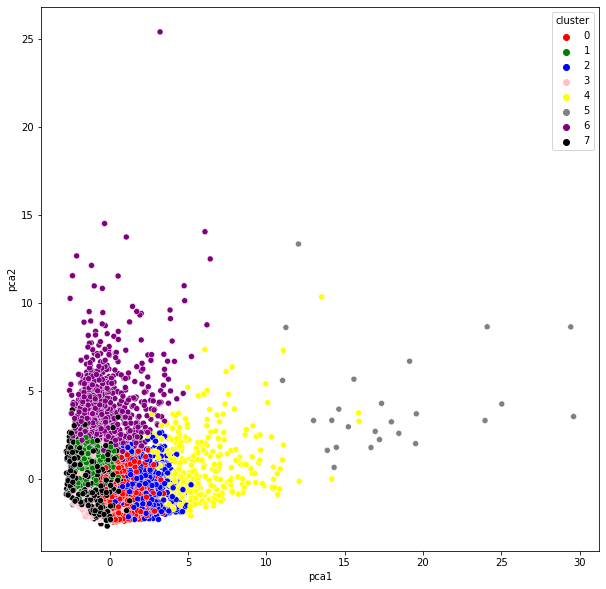

In [314]:
#criando o gráfico dos clusters
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [315]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [316]:
creditcard_df_scaled.shape

(8950, 17)

In [317]:
# 17 neuronios -> 500 neuronios  -> 2000 neuronios  -> 10 neuronios  -> 2000 neuronios  -> 500 neuronios -> 17 neuronios 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [318]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [319]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [320]:
# encoder
encoder = Model(input_df, encoded)

In [321]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [322]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 10s 30ms/step - loss: 0.1847
Epoch 2/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0754
Epoch 3/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0610
Epoch 4/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0689
Epoch 5/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0496
Epoch 6/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0382
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0339
Epoch 8/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0368
Epoch 9/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0298
Epoch 10/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0350
Epoch 11/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0386
Epoch 12/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0386
Epoch 13/50


In [323]:
creditcard_df_scaled.shape

(8950, 17)

In [324]:
compact = encoder.predict(creditcard_df_scaled)

In [325]:
compact.shape

(8950, 10)

In [326]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [327]:
#OBS: NÃO SABEMOS QUAL O ATRIBUTO ESCOLHIDO PELO CLUSTER. PODERIA SER QLQER VALOR DE 0 A 7.
compact[0]

array([0.0000000e+00, 1.4081696e+00, 3.0838925e-01, 0.0000000e+00,
       9.8353195e-01, 7.3700339e-02, 1.0119957e+00, 1.0077933e+00,
       6.5817684e-04, 9.2674032e-02], dtype=float32)

In [328]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

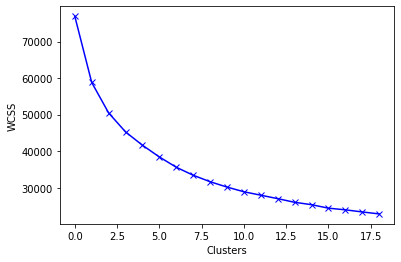

In [329]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

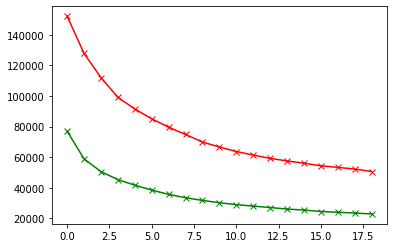

In [330]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [331]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [332]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 2, 0, ..., 3, 3, 3], dtype=int32), (8950,))

In [333]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [334]:
#CRIANDO NOVA BASE DE DADOS (DATAFRAME) REDUZINDO SEUS ATRIBUTOS

pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.025336,-0.451276
1,1.589956,-0.880555
2,-0.238799,0.195641
3,0.535224,-0.524274
4,-1.195096,-0.181569


In [335]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.025336,-0.451276,0
1,1.589956,-0.880555,2
2,-0.238799,0.195641,0
3,0.535224,-0.524274,3
4,-1.195096,-0.181569,0


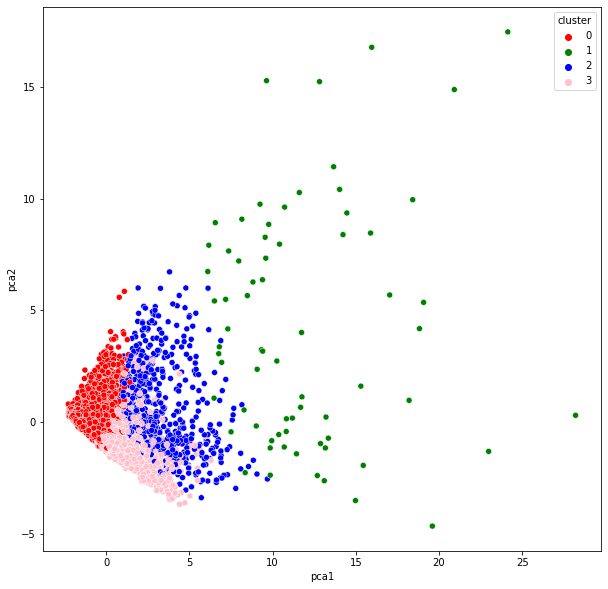

In [336]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [337]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
5427,2206.463745,1.000000,1945.82,521.5,1424.32,194.735790,1.000000,0.083333,1.000000,0.083333,1,56,9000.0,819.905846,679.005417,0.000000,12,0
5426,293.118363,1.000000,368.91,0.0,368.91,683.536421,0.750000,0.000000,0.750000,0.166667,3,18,1800.0,1309.489418,195.953485,0.166667,12,0
5425,94.110539,1.000000,1090.19,0.0,1090.19,0.000000,1.000000,0.000000,1.000000,0.000000,0,19,7000.0,1174.739824,176.285795,0.916667,12,0
5424,1039.256129,1.000000,618.75,0.0,618.75,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1700.0,202.137436,262.204840,0.000000,12,0


In [338]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5566,1441.404242,0.400000,0.00,0.00,0.00,7313.203925,0.000000,0.000000,0.000000,0.400000,5,0,8000.0,462.437204,856.401575,0.000000,10,3
2371,6.121105,0.571429,233.90,233.90,0.00,0.000000,0.428571,0.428571,0.000000,0.000000,0,5,10500.0,33.010201,53.943800,0.000000,7,3
5571,20.700474,0.857143,94.98,0.00,94.98,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1000.0,86.167530,104.771473,0.500000,7,3
5507,1222.745469,0.363636,0.00,0.00,0.00,5396.550576,0.000000,0.000000,0.000000,0.083333,1,0,6000.0,15843.681360,1261.125201,0.333333,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,3


In [339]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
